<a href="https://colab.research.google.com/github/allanbraquiel/Data_Science_Projects/blob/master/Detec%C3%A7%C3%A3o_de_C%C3%A2ncer_de_mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Prevendo ocorrência de câncer de mama

A	rotina	de	exame da	mama	permite	que	a	doença	seja diagnosticada	e	tratada	antes	de causar	sintomas	perceptíveis.	O	processo	de	detecção precoce envolve	a	análise	de	nódulos	ou	massas anormais do	tecido	 da	mama.


Se	 um	 nódulo for	 encontrado,	 uma	 biópsia	 de	 aspiração	 com agulha	 fina	 é	 realizada,	 que	 utiliza	 uma	 agulha	 oca	 para	 extrair	 uma pequena	 amostra	 de células.	Um	clínico,	em	seguida,	examina	as células	sob	um	microscópio	para	determinar	se	a massa	 é	 provável	 que	 seja	 maligna	 ou	 benigna.	 

Se	 a	 aprendizagem	 de	 máquina	 puder automatizar	a	identificação	de	células	cancerígenas,	isso	seria	uma conquista importante	para	o sistema	de	saúde.	

Os	processos	automatizados	permitem melhorar	a	eficiência	do	processo	de detecção,	 permitindo	 que	 os	 médicos	 possam diagnosticar	 o	 problema, avaliar	 o	 gasto necessário	para	resolver	e	ainda	definir	o	tempo	necessário	para	o tratamento	da	doença.	

Um sistema	 de	 rastreamento automatizado	 também	 pode	 proporcionar	 uma	 maior	 precisão	 de detecção	através da	remoção	do	componente	humano, inerentemente	subjetivo, do	processo.

Iremos	investigar	a	utilidade	da	aprendizagem	de	máquina	para	detectar	o	câncer,	aplicando	os algoritmos	de	classificação	DecisionTreeClassifier, KNN	e MLP Classifier para	medições	de células	provenientes	de	biópsias	de	mulheres com	nódulos	mamários anormais.

Usaremos dados reais, fornecidos pelo repositório de Machine Learning da UCI, neste link:
http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Informações dos atributos:

1) **id** - ID número

2) **diagnosis** - Diagnóstico (M = maligno, B = benigno)

Dez características de valor real são calculadas para cada núcleo celular:

a) **radius** - raio (média das distâncias do centro aos pontos no perímetro)

b) **texture** - textura (desvio padrão dos valores da escala de cinza)

c) **perimeter** - perímetro

d) **area** - área

e) **smoothness** - suavidade (variação local nos comprimentos dos raios)

f) **compactness** - compacidade (perímetro ^ 2 / área - 1,0)

g) **concavity** - concavidade (severidade das porções côncavas do contorno)

h ) **concave points** - pontos côncavos (número de porções côncavas do contorno)

i) **symmetry** -  simetria

j) **fractal dimension** - dimensão fractal ("aproximação da linha costeira" - 1)


# Explorando os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

Carregando os dados armazenandos em um repositório no GitHub

In [2]:
url = "https://raw.githubusercontent.com/allanbraquiel/Datasets/master/bc_data.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


Alterando o tipo da variável de diagnóstico para categórico

In [10]:
df.diagnosis = df.diagnosis.astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 569 non-null    int64   
 1   diagnosis          569 non-null    category
 2   radius_mean        569 non-null    float64 
 3   texture_mean       569 non-null    float64 
 4   perimeter_mean     569 non-null    float64 
 5   area_mean          569 non-null    float64 
 6   smoothness_mean    569 non-null    float64 
 7   compactness_mean   569 non-null    float64 
 8   concavity_mean     569 non-null    float64 
 9   points_mean        569 non-null    float64 
 10  symmetry_mean      569 non-null    float64 
 11  dimension_mean     569 non-null    float64 
 12  radius_se          569 non-null    float64 
 13  texture_se         569 non-null    float64 
 14  perimeter_se       569 non-null    float64 
 15  area_se            569 non-null    float64 
 16  smoothne

Porcetagem da distribuição dos resultados benignos(B) e malignos(M)

In [7]:
df.diagnosis.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

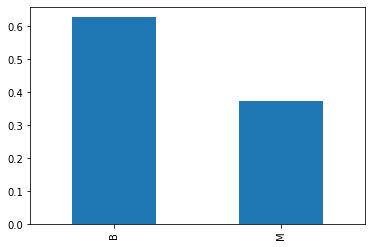

In [9]:
df.diagnosis.value_counts(normalize=True).plot.bar()

Este gráfico pode mostrar o relacionamento entre todas as variáveis, o que nos ajuda a definir quais serão utilizadas para a criação do modelo, onde os valores mais próximo de 1 indicam uma forte correlação positiva e valores próximos de -1 mostram uma forte correlação negativa e os próximos de 0 indicam nenhuma correlação.

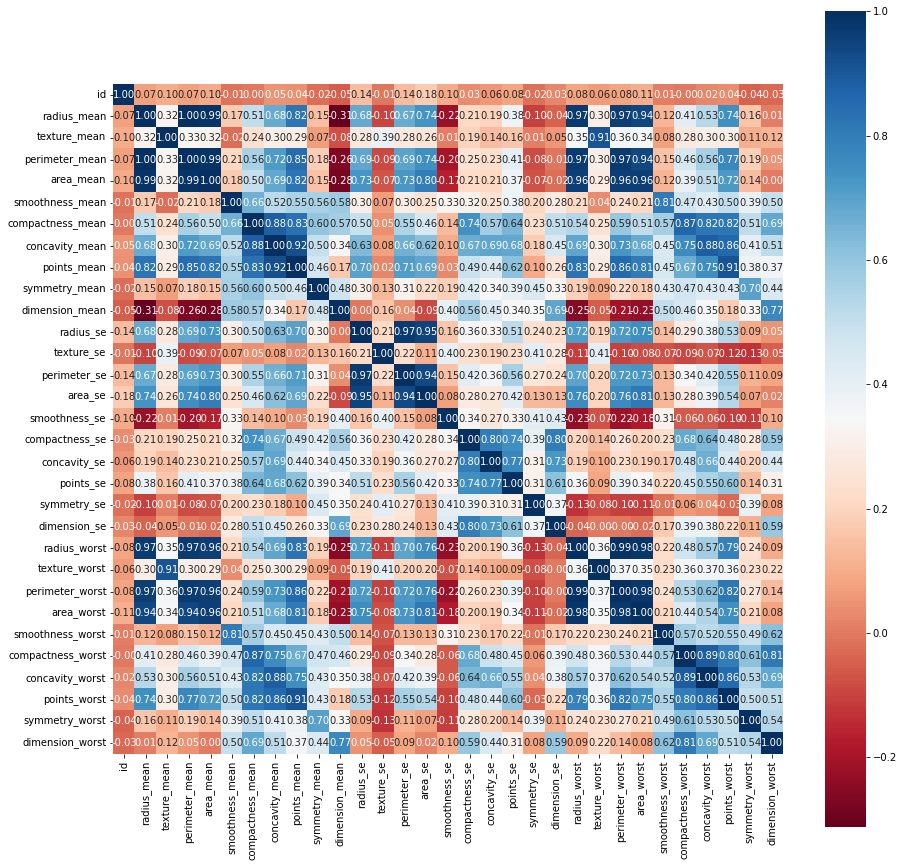

In [11]:
df_correlacao = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(df_correlacao, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

# Separando os dados

Para o treinamento do modelo iremos excluir a variável id pois ela pode influnciar no modelo e levar a resultados incorretos, tendo em vista que esta variável é somente uma identificação do registro. Outra ação que tomaremos agora será de separar as variáveis preditivas (features) do resultado (target).

In [15]:
x_data = df.drop(["id", "diagnosis"], axis=1)
y_data = df["diagnosis"]

#Normalizando os dados

Analisando os dados, verificamos que as variáveis se encontram em diversas escalas diferentes, portanto é necessário a normalização de todas as colunas para o treinamento do modelo.

In [16]:
X = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

Separando os dados de treino e teste

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y_data, test_size=0.3, random_state=42) 

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (398, 30)
x test:  (171, 30)
y train:  (398,)
y test:  (171,)


# Importância das Features

O conjunto de dados possui muitas colunas e possivelmente nem todas elas contribuem de forma significativa para o treinamento do modelo, dessa forma, iremos usar o algoritmo de Árvore de Decisão para tentar identificar quais as variáveis preditoras tem maior relevância para o modelo.

In [32]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [20]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [21]:
result = clf.predict(x_test)

In [22]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, result))
print(metrics.classification_report(y_test, result))

[[104   6]
 [  6  55]]
              precision    recall  f1-score   support

           B       0.95      0.95      0.95       110
           M       0.90      0.90      0.90        61

    accuracy                           0.93       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



A biblioteca feature_importances_ calcula qual foi a relevância que cada variável teve para a obtenção do resultado

In [23]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns)
feature_imp =  feature_imp.sort_values(ascending=False)

Agora podemos verifcar graficamente a importância de cada feature para o modelo

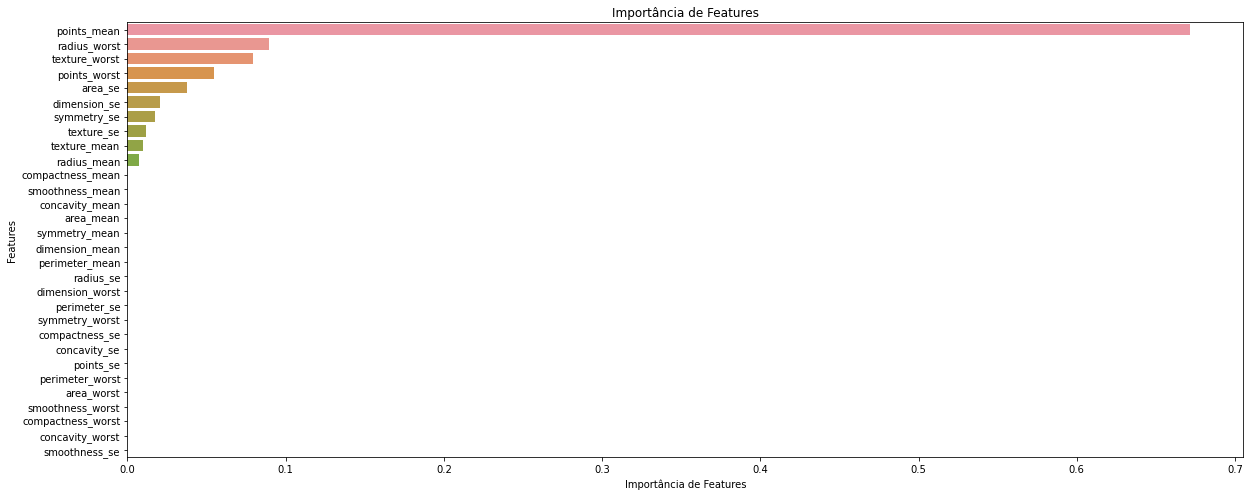

In [24]:
plt.figure( figsize=(20, 8))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Importância de Features")
plt.ylabel("Features")
plt.title("Importância de Features")

plt.show()

Agora que já identificamos quais variáveis tem mais relevância para a obtenção do resultado, iremos eliminar as colunas menos importantes para a criação do modelo criando um novo dataset somente com as variáveis mais importantes.

In [25]:
X2 = X[["points_mean", "radius_worst", "texture_worst", "points_worst", "area_se", "dimension_se", "symmetry_se", "texture_se", "radius_mean"]]

Verificando a correlação com as features que restaram

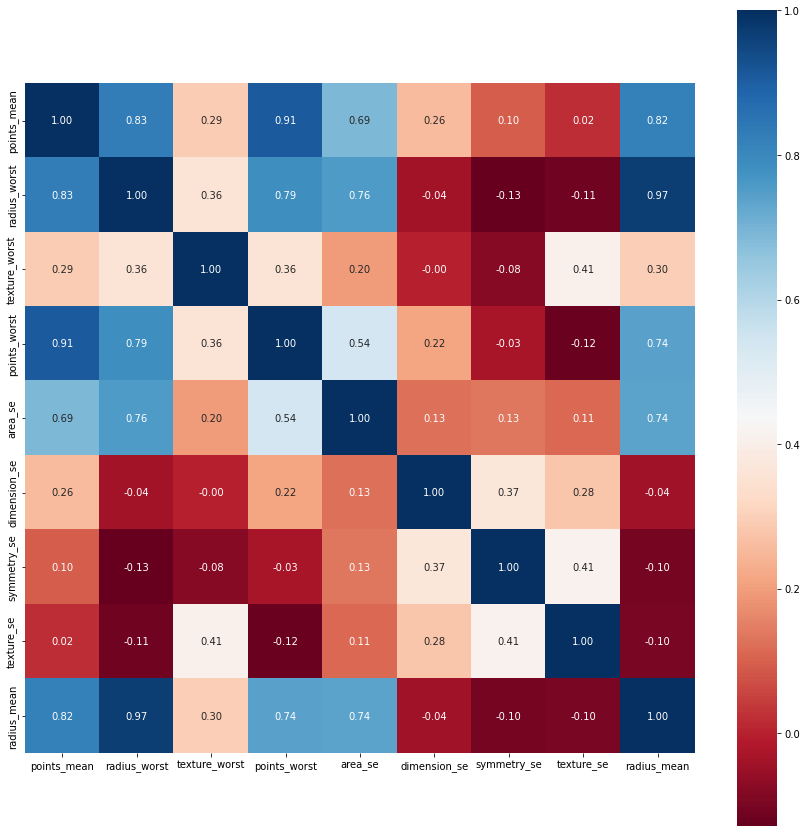

In [26]:
df_correlacao = X2.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(df_correlacao, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Agora que selecionamos as features mais importantes, iremo treinar o modelo novamente

# DecisionTreeClassifier

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X2, y_data, test_size=0.3, random_state=42) 

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (398, 9)
x test:  (171, 9)
y train:  (398,)
y test:  (171,)


In [29]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
result = clf.predict(x_test)

In [31]:
print(confusion_matrix(y_test, result))
print(metrics.classification_report(y_test, result))

[[104   6]
 [  4  57]]
              precision    recall  f1-score   support

           B       0.96      0.95      0.95       110
           M       0.90      0.93      0.92        61

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



Podemos ver que com este algoritmo a média ponderada (f1-score) entre a precisão (precision) e a recuperação (recall) foi de 95% para benignos e 91% para malígnos, sendo que houveram 6 falsos positivos e 5 falsos negativos.

Ajustando os parâmetros

In [33]:
clf = DecisionTreeClassifier(max_depth = None, 
                             max_features = None, 
                             criterion = 'entropy', 
                             min_samples_leaf = 1, 
                             min_samples_split = 2)

In [34]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [35]:
result = clf.predict(x_test)
print(confusion_matrix(y_test, result))
print(metrics.classification_report(y_test, result))

[[104   6]
 [  3  58]]
              precision    recall  f1-score   support

           B       0.97      0.95      0.96       110
           M       0.91      0.95      0.93        61

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



# Usando metodos Emsemble - Adabost

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

# Construindo o estimador base
estim_base = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1)
estim_base.fit(x_train, y_train)
estim_base_err = 1.0 - estim_base.score(x_test, y_test)

In [43]:
ada_clf = AdaBoostClassifier(base_estimator = estim_base, 
                                  learning_rate = 1.0, 
                                  n_estimators = 400, 
                                  algorithm = "SAMME")

In [44]:
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=400)

In [49]:
result = ada_clf.predict(x_test)
print(confusion_matrix(y_test, result))
print(metrics.classification_report(y_test, result))

[[108   2]
 [  3  58]]
              precision    recall  f1-score   support

           B       0.97      0.98      0.98       110
           M       0.97      0.95      0.96        61

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



# Analisando os resultados

Lendo a Confusion Matrix (Perspectiva de ter ou não a doença):

**Verdadeiro Negativo**: Nosso modelo previu que a pessoa NÃO tinha a doença e os dados mostraram que realmentente não tinha a doença

**Falso Positivo**: Nosso modelo previu que a pessoa tinha a doença e os dados mostraram que NÃO, a pessoa não tinha a doença

**Falso Negativo**: Nosso modelo previu que a pessoa NÃO tinha a doença e os dados mostraram que SIM, a pessoa tinha a doença

**Verdadeiro Positivo**: Nosso modelo previu que a pessoa tinha a doença e os dados mostraram que SIM, a pessoa tinha a doença

Falso Positivo - Erro Tipo I

Falso Negativo - Erro Tipo II

Taxa de acerto do Modelo: 97% (acertou 97 em 100)